We use pretrained ResNet-50 to classify an input image.

In [15]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import os
import imageio

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

def plot_color_image(image):
    fig = plt.figure()
    plt.imshow(image, interpolation="nearest")
    plt.axis("off")

/tmp/ipykernel_8368/4270642265.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread('./data/triceratops.jpg')/255.0


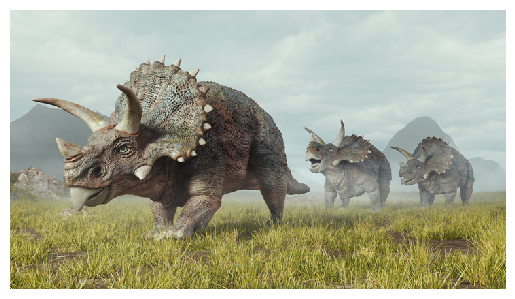

In [78]:
img = imageio.imread('./data/triceratops.jpg')/255.0
plot_color_image(img)

We need to resize the images to work with ResNet

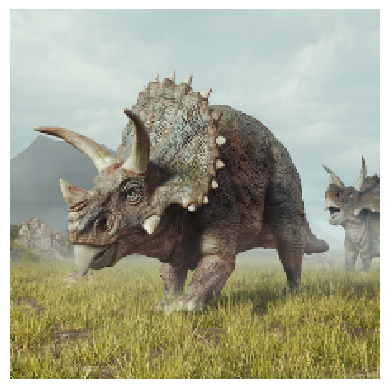

In [17]:
boxes = [[0, 0.0, 1, 0.7]]
images_resized = tf.image.crop_and_resize([img], boxes, [0], [224, 224])
plot_color_image(images_resized[0])
plt.show()

/tmp/ipykernel_8368/4074517263.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img2 = imageio.imread('./data/f1.jpg')/255.0


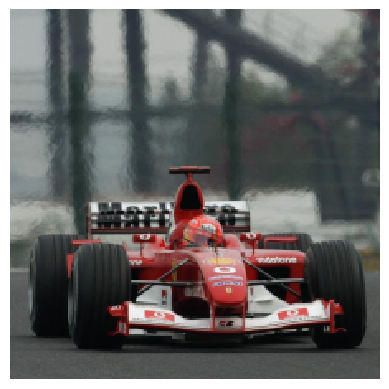

In [80]:
img2 = imageio.imread('./data/f1.jpg')/255.0
plot_color_image(img2)

In [18]:
model = keras.applications.resnet50.ResNet50(weights="imagenet")

In [85]:
inputs1 = keras.applications.resnet50.preprocess_input(images_resized * 255)
Y_proba = model.predict(inputs1)

top_K = keras.applications.resnet50.decode_predictions(Y_proba, top=3)
for image_index in range(len(images_resized)):
    print("Image #{}".format(image_index))
    for class_id, name, y_proba in top_K[image_index]:
        print("  {} - {:12s} {:.2f}%".format(class_id, name, y_proba * 100))
    print()

<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[109.061    , 103.221    ,  83.32     ],
         [111.061    , 105.221    ,  85.32     ],
         [112.63769  , 106.79769  ,  86.89669  ],
         ...,
         [103.50765  ,  92.221    ,  69.32     ],
         [104.061    ,  91.23266  ,  70.30834  ],
         [102.46102  ,  90.621025 ,  67.720024 ]],

        [[111.73812  , 105.898125 ,  85.99712  ],
         [115.97993  , 110.13993  ,  90.23893  ],
         [117.66979  , 111.3462   ,  92.41238  ],
         ...,
         [104.061    ,  92.221    ,  69.32     ],
         [104.061    ,  92.221    ,  69.32     ],
         [103.71259  ,  91.8726   ,  68.971596 ]],

        [[116.092384 , 109.575264 ,  91.02853  ],
         [118.83123  , 112.221    ,  93.86045  ],
         [119.73812  , 112.898125 ,  94.99712  ],
         ...,
         [104.061    ,  92.221    ,  69.32     ],
         [103.061    ,  91.221    ,  68.32     ],
         [103.061    ,  91.221    ,  68.32    

1/1 [==============================] - 0s 59ms/step
Image #0
  n01704323 - triceratops  99.99%
  n02417914 - ibex         0.01%
  n02454379 - armadillo    0.00%



In [94]:
inputs2 = keras.applications.resnet50.preprocess_input(tf.image.resize(img2.reshape(-1, 224, 224, 3)*255, size=(224,224)))
Y_proba = model.predict(inputs2)

top_K = keras.applications.resnet50.decode_predictions(Y_proba, top=3)
for class_id, name, y_proba in top_K[0]:
    print("  {} - {:12s} {:.2f}%".format(class_id, name, y_proba * 100))

1/1 [==============================] - 0s 60ms/step
  n04037443 - racer        98.91%
  n04285008 - sports_car   0.54%
  n03444034 - go-kart      0.48%


177
1/1 [==============================] - 0s 369ms/step


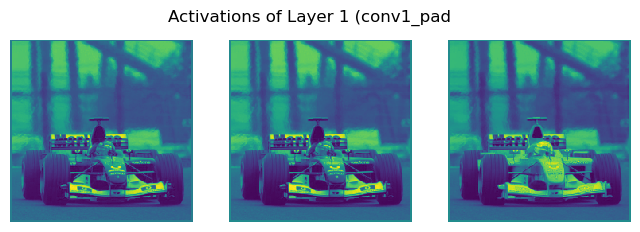

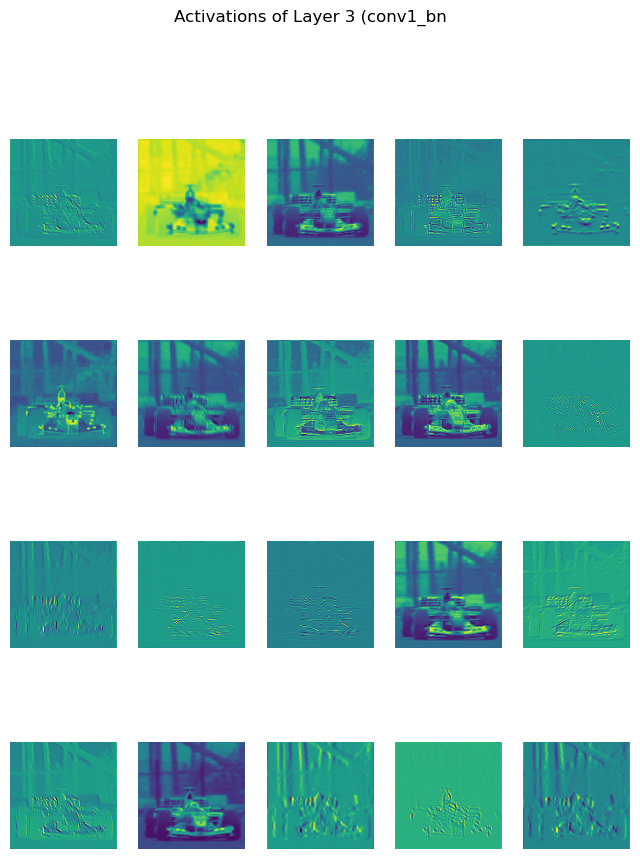

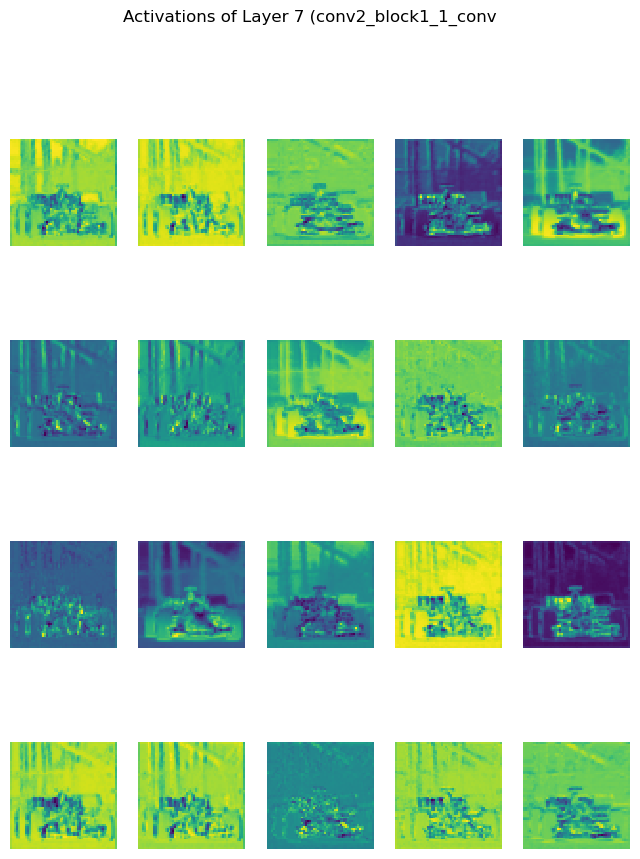

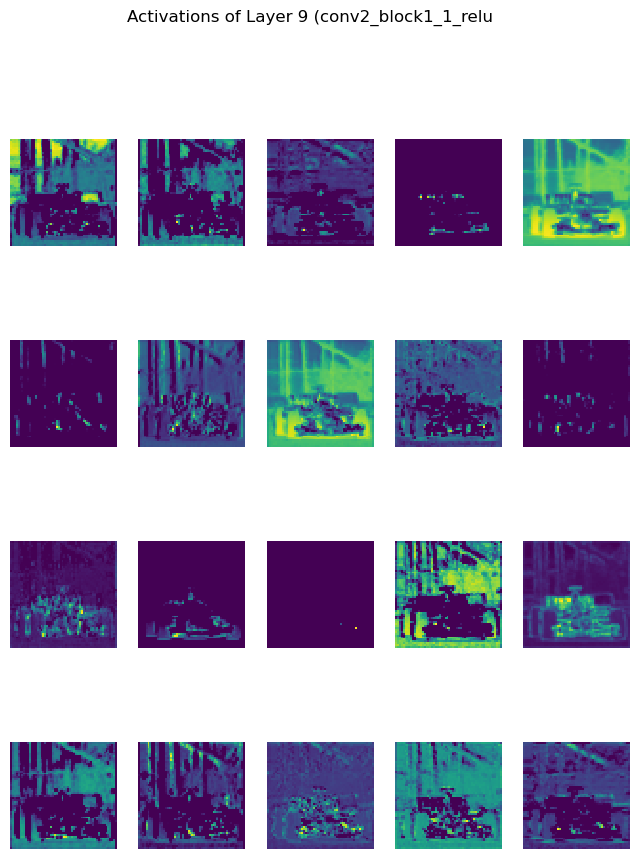

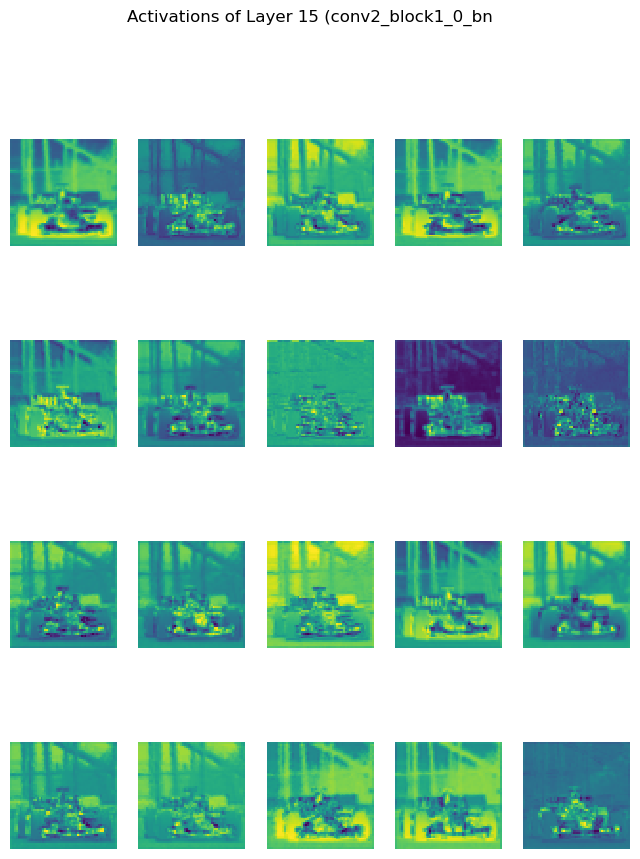

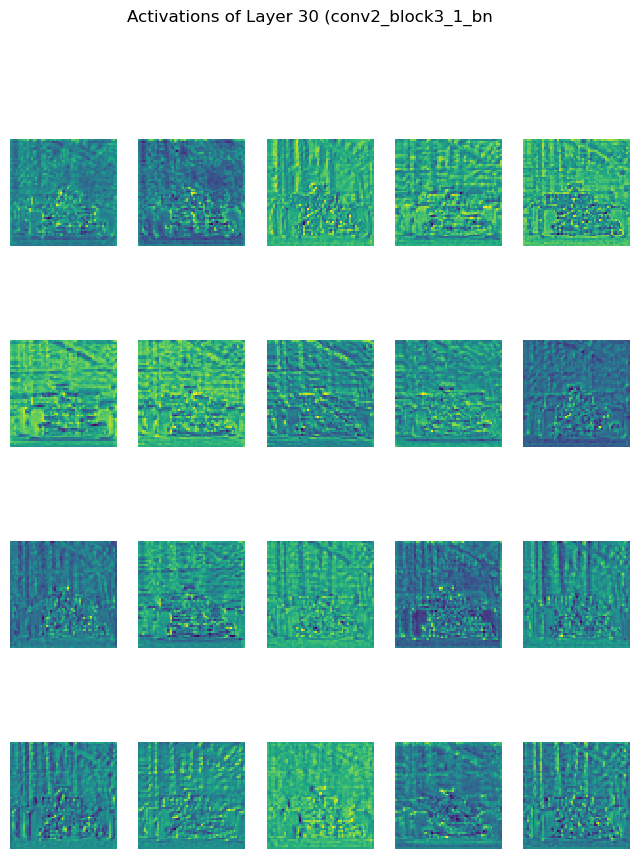

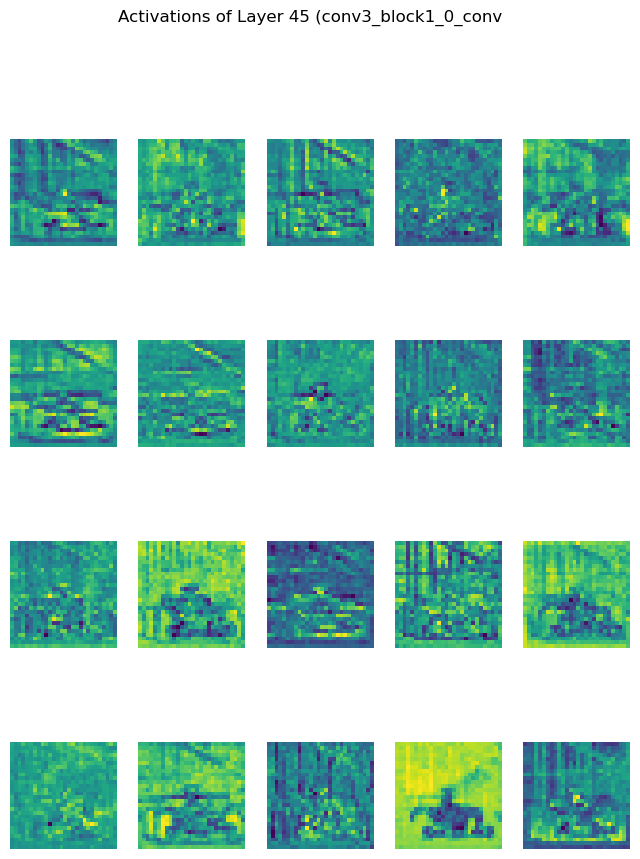

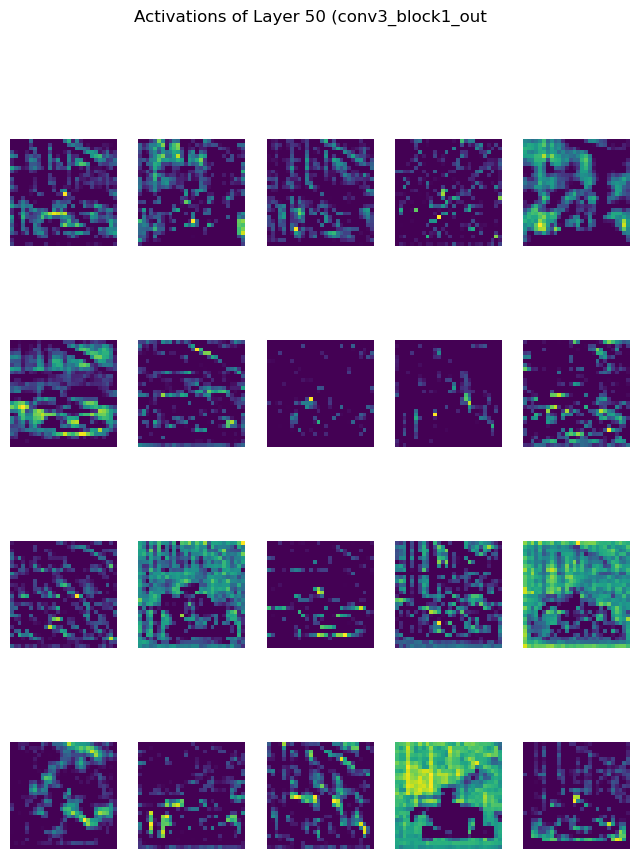

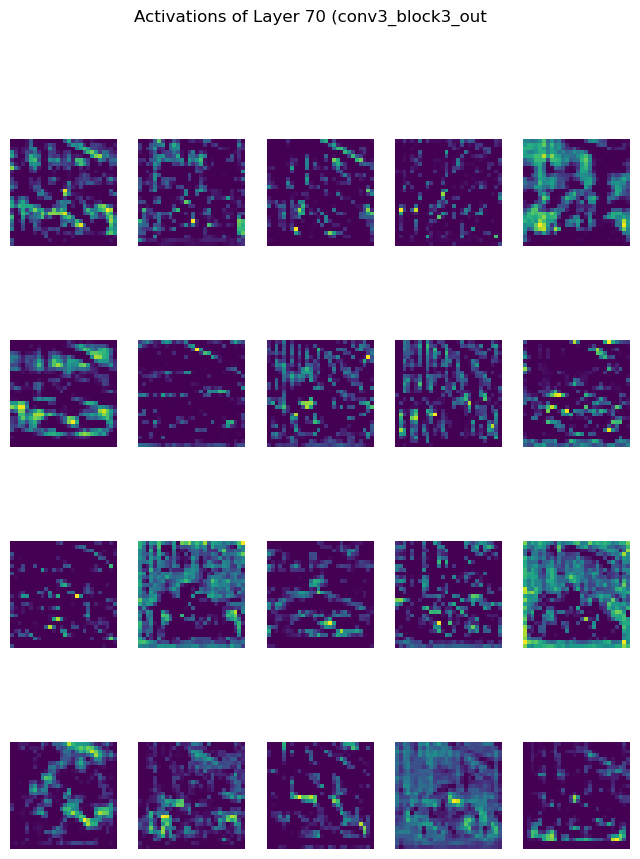

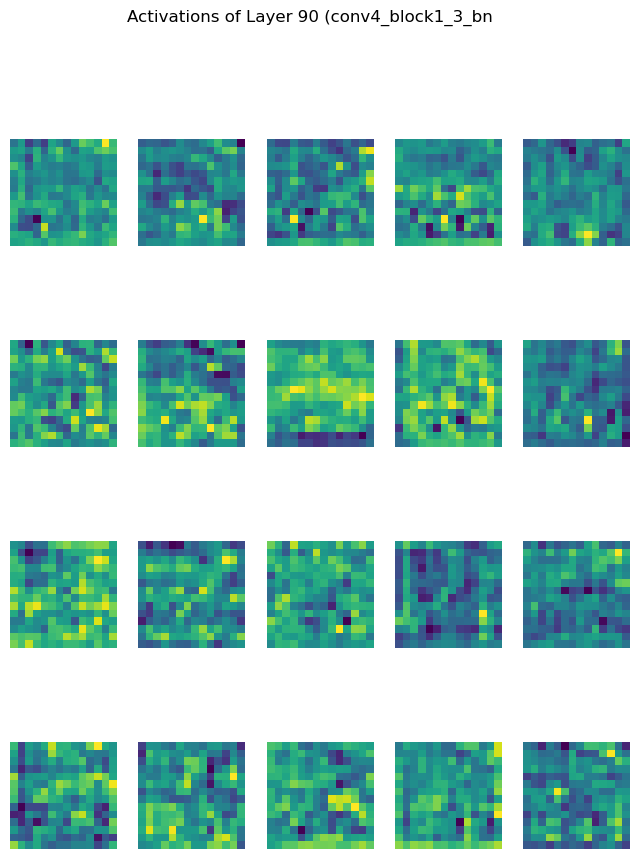

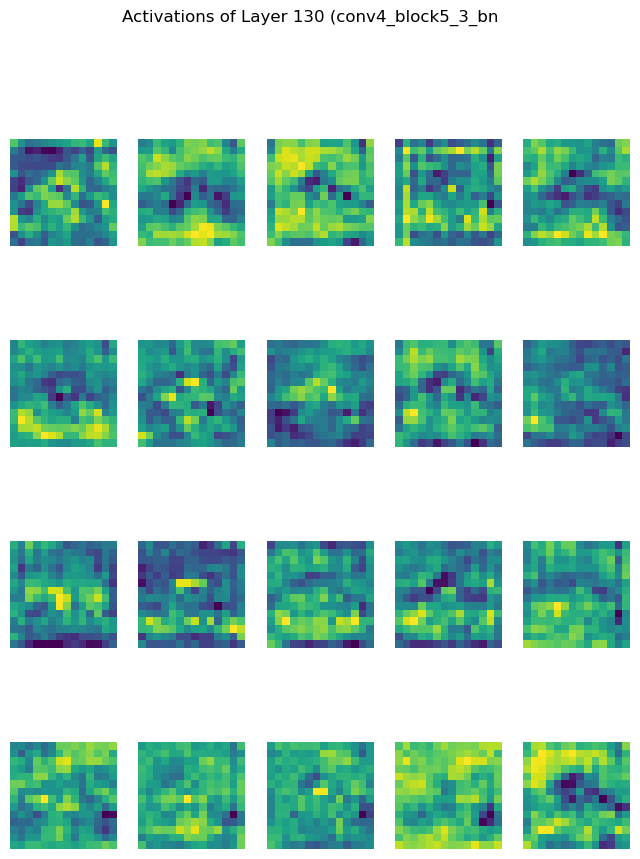

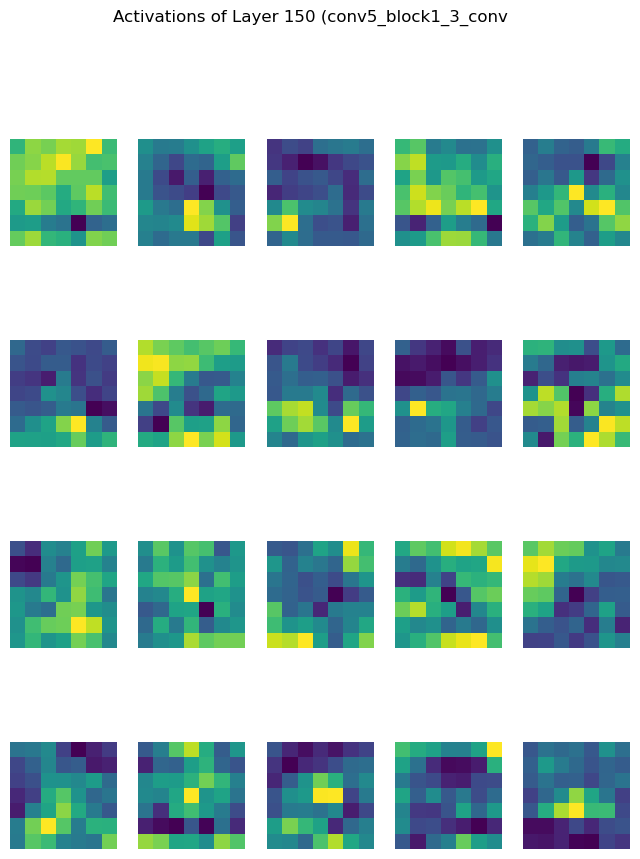

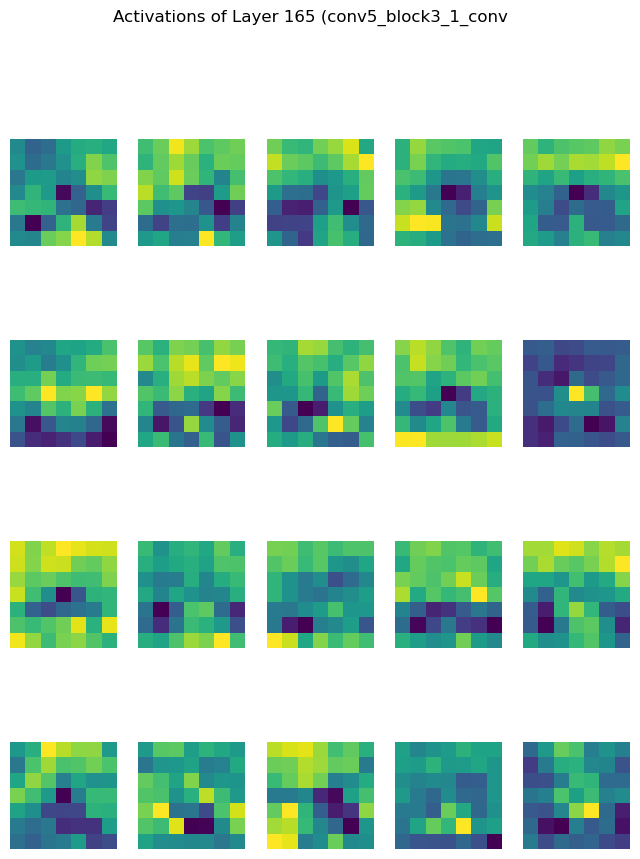

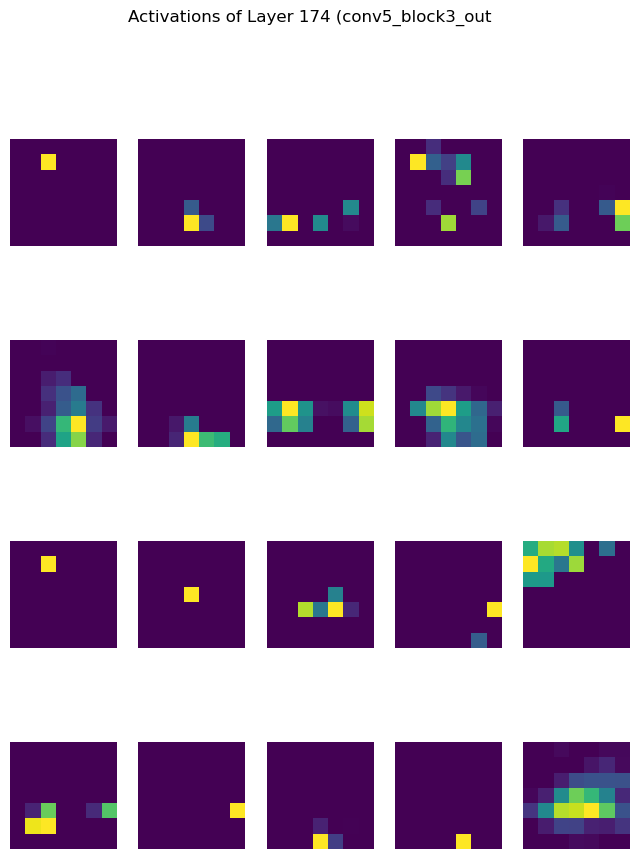

In [95]:
import math
def plot_feature_maps(output, title="", max_maps=20):
    n = min(max_maps, output.shape[-1])
    cols = 5 if n >= 5 else 3
    rows = int(math.ceil(n/cols))
    fig,axs = plt.subplots(rows, cols, figsize=(8,2.5*rows))
    fig.suptitle(title)
    for i,ax in enumerate(axs.flat):
        ax.imshow(output[0,:,:,i], interpolation="nearest")
        ax.axis("off")

print(len(model.layers))
for layer_i in [1,3,7,9,15,30,45,50,70,90,130,150,165,174]:
    truncated_model = keras.Model(inputs = model.layers[0].input, outputs = model.layers[layer_i].output) 
    layer_name = model.layers[layer_i].name
    output = truncated_model.predict(inputs2)
    plot_feature_maps(output, title=f"Activations of Layer {layer_i} ({layer_name}")
